In [6]:
import gymnasium as gym
import environment
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [15]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.5, efficiency_param = 1, cl_wide = 20, render_mode="human")
model = PPO.load("models/210424/210424_4M_LearningStudy_0.00024_Gamma0.99/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:394.74 +/- 105.22


In [16]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

Step: 0, Action: [[ 0.499451    0.3926892   0.60822725  1.          1.          1.
   1.          1.          1.          1.         -0.39084113 -0.07968888
   0.55674815  0.04805155 -0.23991956 -1.         -1.         -1.
  -1.         -0.6802673   0.30832818]], Reward: [8.168325], Done: [False], Info: [{'step': 1, 'efficiency': 31.926546560502416, 'cl': 0.23892779661332397, 'TimeLimit.truncated': False}]


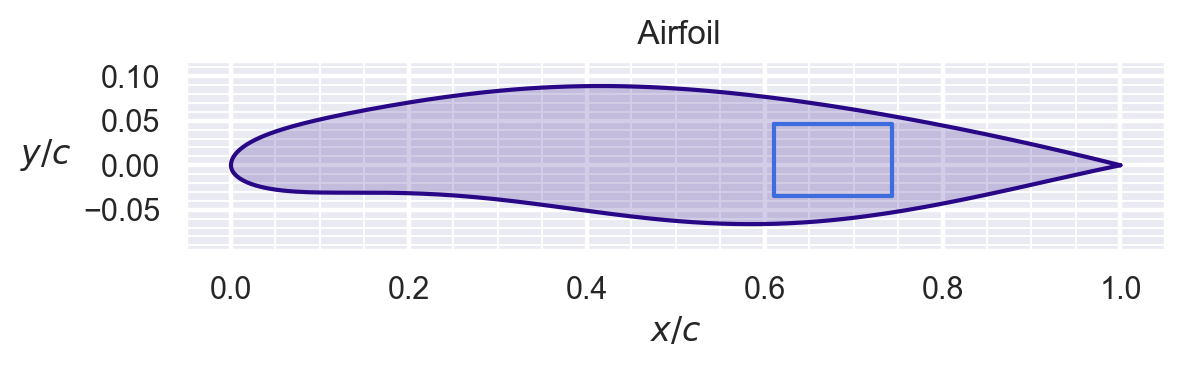

Step: 1, Action: [[ 0.5762459   0.23558563  0.75945103  1.          1.          1.
   1.          1.          1.          0.9540601   0.03489113  0.46075153
   0.49071833 -0.18319255  0.20361818 -0.2260942  -0.9674375  -0.7678623
  -0.37052822  0.2799406   0.63864034]], Reward: [48.53473], Done: [False], Info: [{'step': 2, 'efficiency': 70.56329345282421, 'cl': 0.6367900736037244, 'TimeLimit.truncated': False}]


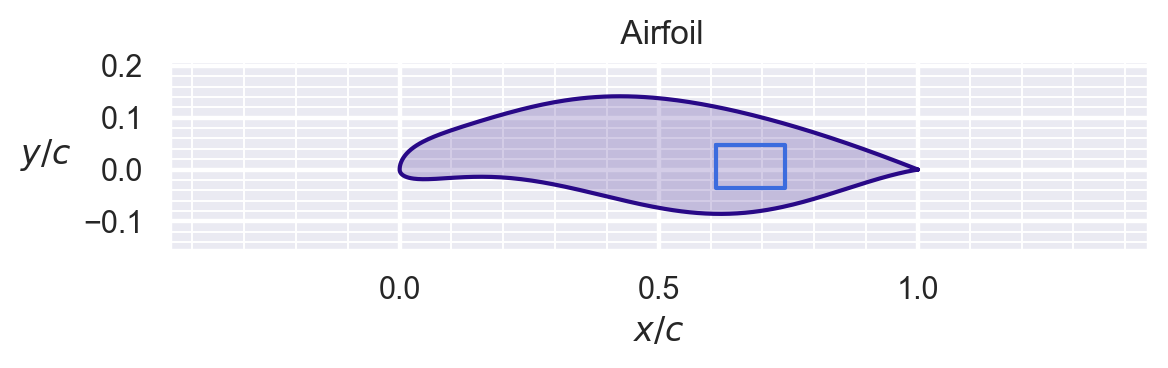

Step: 2, Action: [[ 0.09514564  0.22406945  0.29313242  0.39698595  0.4842382   0.5535772
  -0.24600911 -0.25939652  0.20821635 -0.43811393  0.09091868 -0.32312
  -0.35030812 -0.78806317  0.3676986   0.5887327   0.23393297  0.7705417
  -0.13286719  0.38418764 -0.0522948 ]], Reward: [59.789993], Done: [False], Info: [{'step': 3, 'efficiency': 60.01217546989305, 'cl': 0.5136183322780571, 'TimeLimit.truncated': False}]


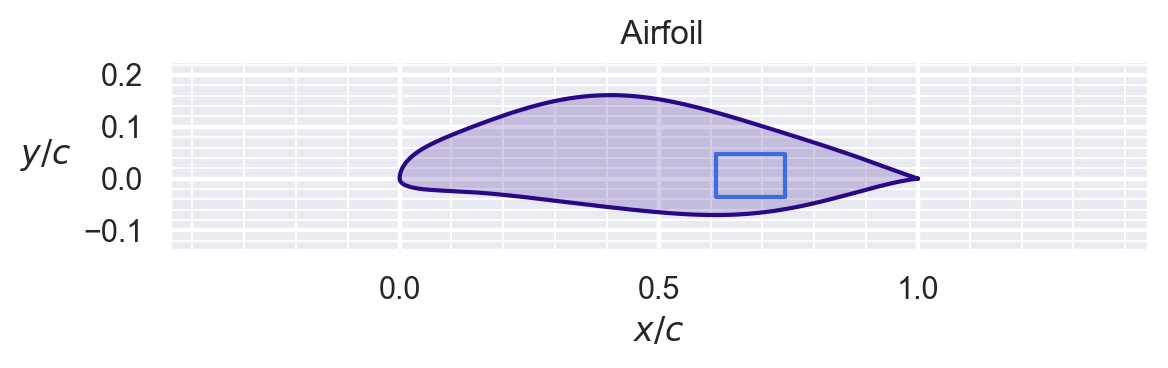

Step: 3, Action: [[-0.0753336   0.24624339  0.0657095   0.16332898  0.15649502  0.08954759
  -0.2059111  -0.09327364  0.08463912 -0.04422015 -0.081266   -0.14520487
   0.11491579 -0.08525288  0.08118656  0.05190666  0.09679744  0.21711832
  -0.3130514   0.18278451 -0.00227255]], Reward: [57.771725], Done: [False], Info: [{'step': 4, 'efficiency': 57.8132912113329, 'cl': 0.5059967883492309, 'TimeLimit.truncated': False}]


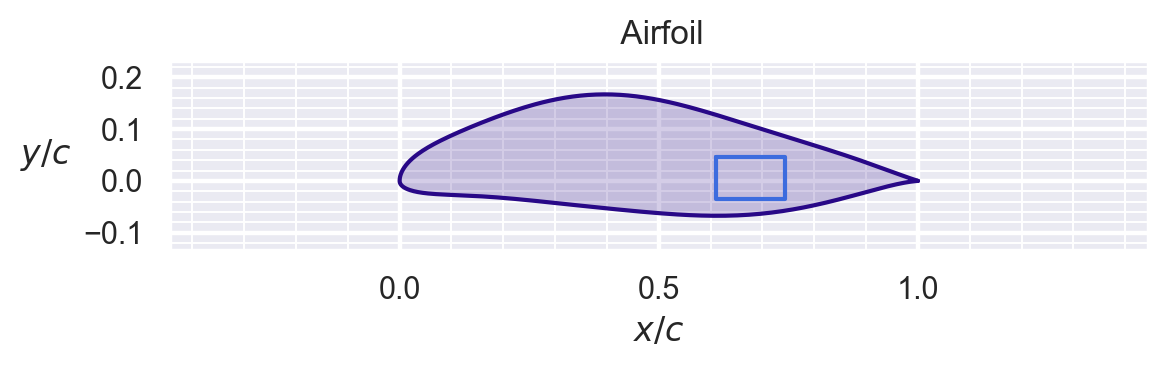

Step: 4, Action: [[-0.05374959  0.14569092 -0.08198136  0.05613518  0.05066609 -0.01970188
  -0.08322456  0.00395727  0.03842352  0.08348671 -0.0241313  -0.14950398
   0.07083344  0.01556227  0.01433702 -0.0033948   0.06868939  0.02761098
  -0.40183654  0.0560593   0.03030874]], Reward: [57.42001], Done: [False], Info: [{'step': 5, 'efficiency': 57.4213199663888, 'cl': 0.5010683042232906, 'TimeLimit.truncated': False}]


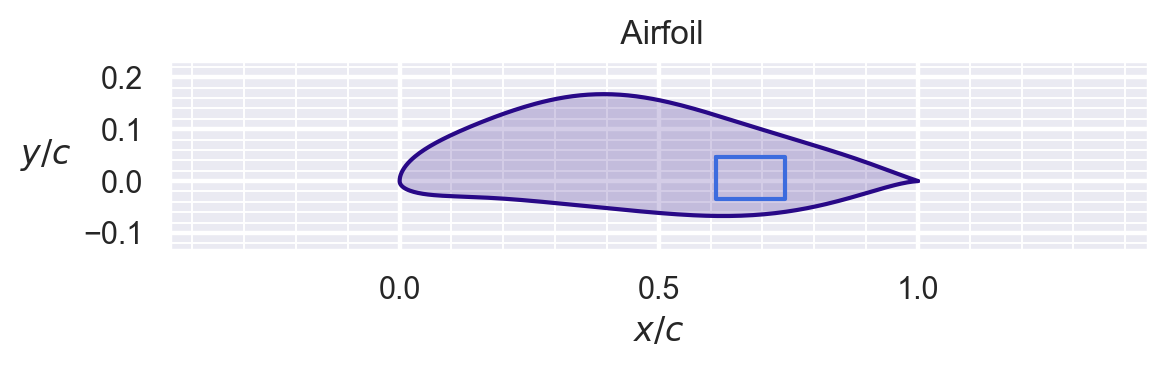

Step: 5, Action: [[-0.05661196  0.08612901 -0.07802433  0.04930064  0.01413614 -0.037324
  -0.05598086  0.03560087  0.02389045  0.09598804 -0.00729135 -0.10164882
   0.0462341   0.006862   -0.02464257 -0.00519353  0.05884449 -0.00212786
  -0.2952647   0.08943987  0.06675076]], Reward: [56.92734], Done: [False], Info: [{'step': 6, 'efficiency': 56.9723228721834, 'cl': 0.49371563994054113, 'TimeLimit.truncated': False}]


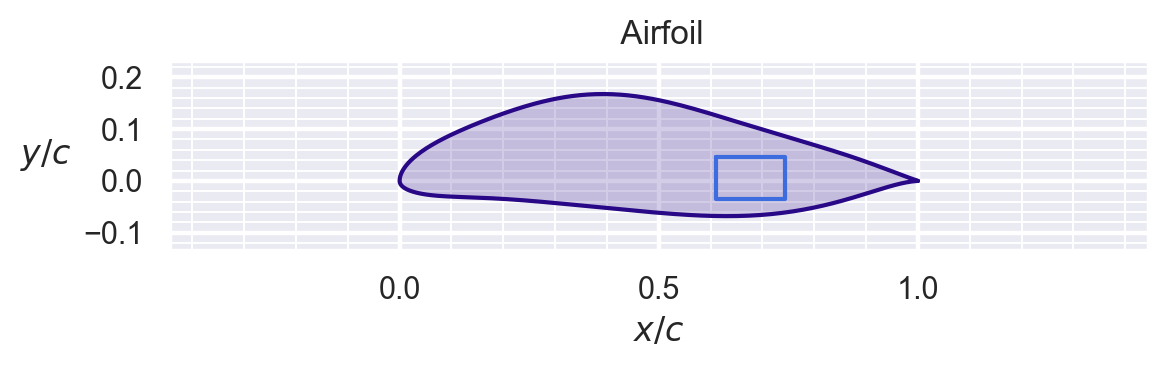

Step: 6, Action: [[-0.05188063  0.05322012 -0.06911716  0.04323147 -0.0035335  -0.02936357
  -0.04767901  0.04245558  0.02279343  0.08956522 -0.00937329 -0.06469131
   0.03535703  0.00695567 -0.02539398 -0.00438246  0.05860201 -0.0136456
  -0.19699155  0.10143523  0.07671405]], Reward: [56.397823], Done: [False], Info: [{'step': 7, 'efficiency': 56.55221288943032, 'cl': 0.48830856493150365, 'TimeLimit.truncated': False}]


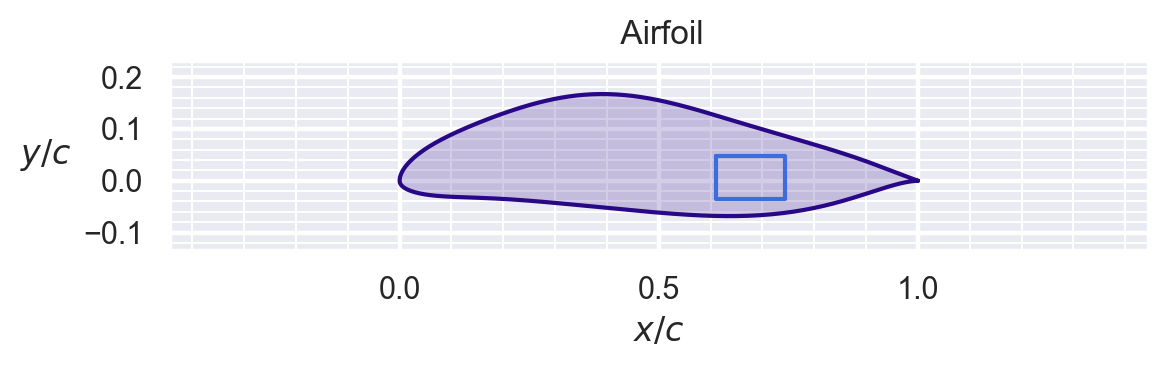

Step: 7, Action: [[-0.04363567  0.03630364 -0.05857083  0.03696802 -0.01281907 -0.01636778
  -0.04324907  0.04186699  0.02314855  0.07828367 -0.00938188 -0.04501957
   0.02693889  0.00749828 -0.01709343 -0.00780797  0.05634008 -0.02344237
  -0.13467205  0.0968098   0.0691595 ]], Reward: [55.9981], Done: [False], Info: [{'step': 8, 'efficiency': 56.2544066623054, 'cl': 0.4848893881657954, 'TimeLimit.truncated': False}]


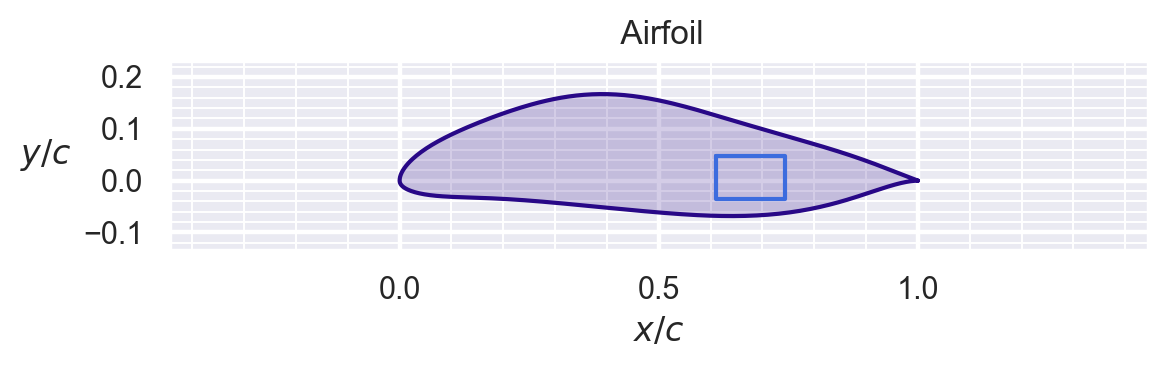

Step: 8, Action: [[-0.03506771  0.02646549 -0.04830948  0.03236851 -0.01734222 -0.00514533
  -0.04009768  0.0380899   0.02179798  0.06577545 -0.00827551 -0.03373669
   0.02059987  0.00628178 -0.00937635 -0.01163878  0.05322471 -0.0304224
  -0.09547624  0.08752988  0.0567115 ]], Reward: [55.72045], Done: [False], Info: [{'step': 9, 'efficiency': 56.05150795854188, 'cl': 0.4827898560899144, 'TimeLimit.truncated': False}]


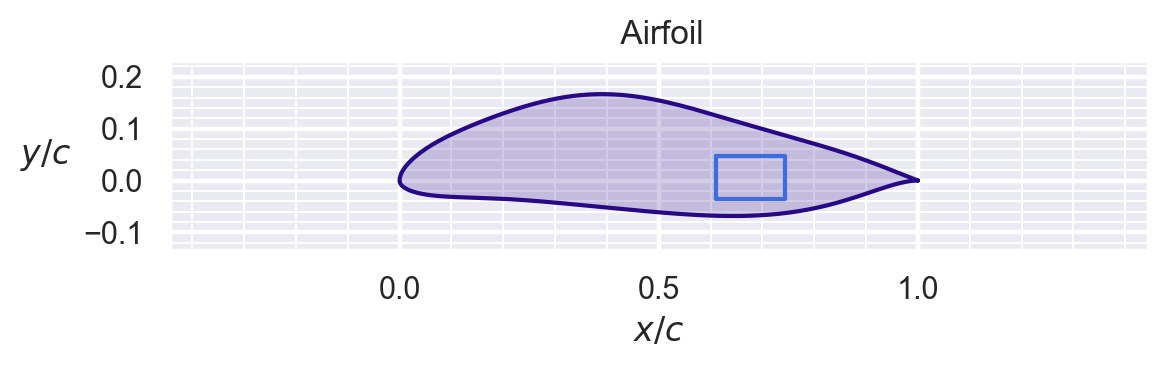

Step: 9, Action: [[-0.0277817   0.02047206 -0.03979161  0.02885574 -0.01916583  0.00298549
  -0.03680798  0.03330782  0.01887952  0.05434605 -0.00707306 -0.02639997
   0.01616511  0.00432025 -0.00366169 -0.01445206  0.05005266 -0.0348115
  -0.07040908  0.07747726  0.04455941]], Reward: [55.533764], Done: [ True], Info: [{'step': 10, 'efficiency': 55.91245949164655, 'cl': 0.4815662455923697, 'episode': {'r': 512.262259, 'l': 10, 't': 5.514313}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.22401726,  0.32003033,  0.30260882,  0.5210762 ,  0.49790123,
        0.48073116,  0.2861561 ,  0.37639126,  0.46626836,  0.3908757 ,
       -0.16177356, -0.17623939,  0.05423039, -0.24414653, -0.04798708,
       -0.19484866, -0.29364306, -0.22855616, -0.55166453,  0.00130953,
        0.18549077], dtype=float32), 'cl_target': array([0.5], dtype=float32), 'boxes': array([0.67682534, 0.00597017, 0.1320646 , 0.08189818], dtype=float32)}}]


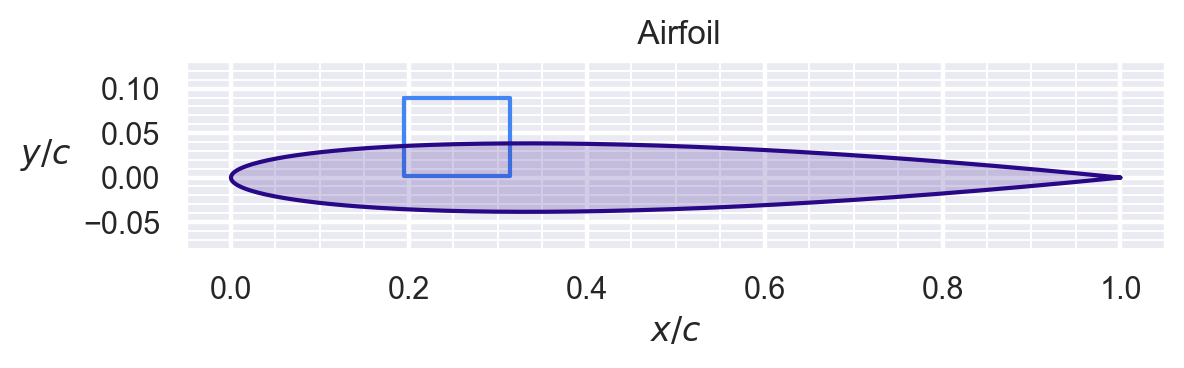

Step: 10, Action: [[ 1.          1.          1.          1.          1.          1.
   0.5816742   0.97007346  0.6187718   0.89945996 -0.6512848  -0.2607451
   0.24640754 -0.00317508 -0.3374014  -0.43161184 -1.         -1.
   1.         -0.09789427  1.        ]], Reward: [2.4568455], Done: [False], Info: [{'step': 1, 'efficiency': 22.096507775415485, 'cl': 0.1685983303499905, 'TimeLimit.truncated': False}]


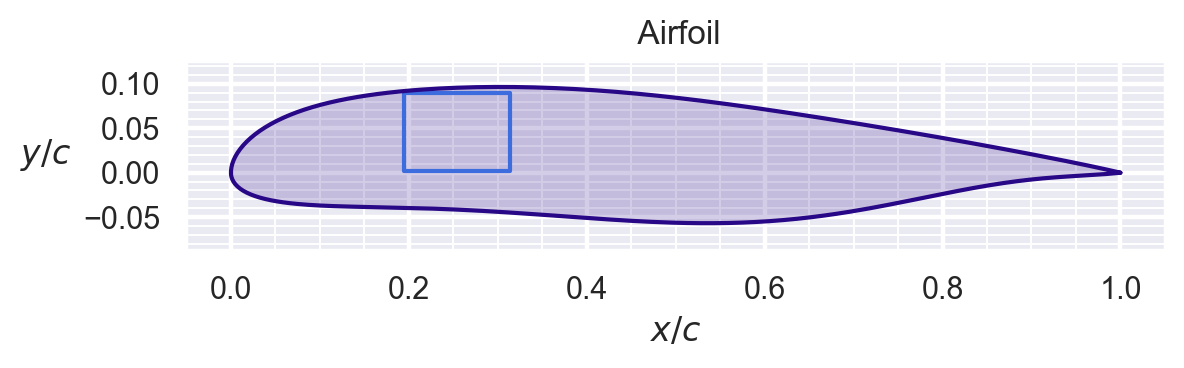

Step: 11, Action: [[ 0.8431596   0.21707553  1.          1.          1.          1.
  -0.26928347  0.18429473  0.23652823  0.26158565 -0.161127    0.42205268
   0.59898925  0.09255396 -0.0684527  -0.03484784 -0.63153493 -0.36349714
   1.          0.27036107  1.        ]], Reward: [55.66079], Done: [False], Info: [{'step': 2, 'efficiency': 57.17832718647719, 'cl': 0.5366735497700958, 'TimeLimit.truncated': False}]


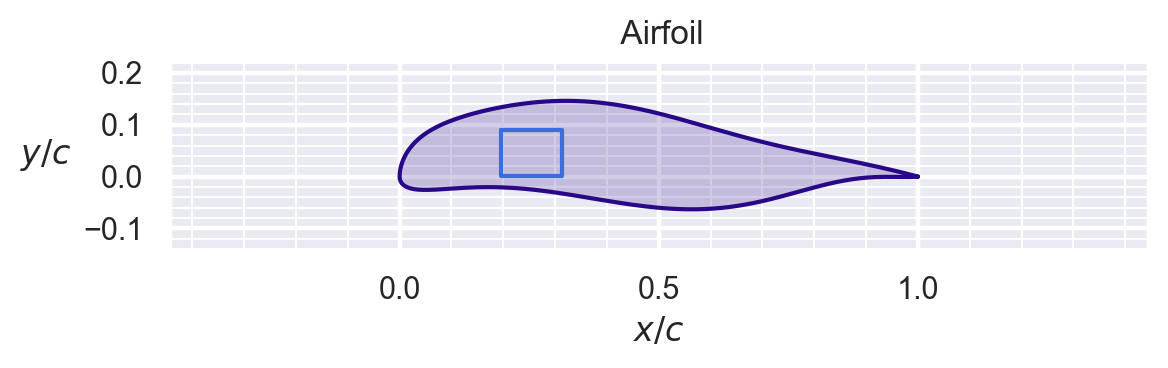

Step: 12, Action: [[-0.14216608  0.01392043  0.17740336  0.30472672  0.3799764   0.41289467
   0.00759265 -0.07918102 -0.06955151 -0.02236587 -0.040931   -0.27096194
  -0.25419402 -0.3478708   0.26642638  0.4257704   0.24467924  0.5277885
   0.43580177 -0.08490326 -0.20277515]], Reward: [51.52567], Done: [False], Info: [{'step': 3, 'efficiency': 51.603482707574805, 'cl': 0.49131362828808367, 'TimeLimit.truncated': False}]


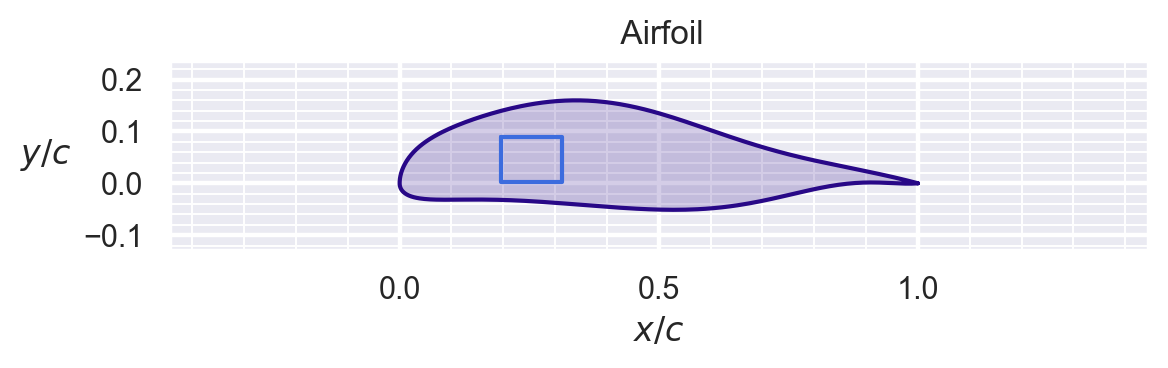

Step: 13, Action: [[-0.04222488  0.16622046  0.02037837  0.12928367  0.14082983  0.10626327
   0.03737473  0.0677996  -0.13279982  0.05524865 -0.07873783 -0.07967436
   0.01625958 -0.03440802  0.05436531  0.03652035  0.06047836  0.2279033
   0.03303224 -0.00624599  0.00649786]], Reward: [52.855373], Done: [False], Info: [{'step': 4, 'efficiency': 53.052412459648785, 'cl': 0.513639926392878, 'TimeLimit.truncated': False}]


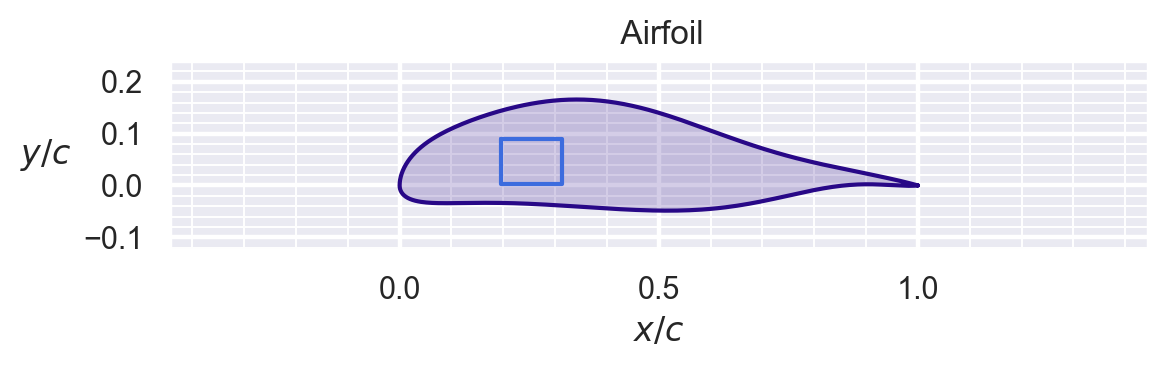

Step: 14, Action: [[-0.02917524  0.09320486 -0.03463617  0.06404631  0.04475985  0.00774856
   0.00478578  0.07924572 -0.11950688  0.06462783 -0.03752735 -0.07853106
   0.01193717  0.00474979  0.0295427  -0.03214869  0.01738787  0.12104201
  -0.12716681 -0.02687493  0.01691898]], Reward: [53.176414], Done: [False], Info: [{'step': 5, 'efficiency': 53.77687859385271, 'cl': 0.5236945578642308, 'TimeLimit.truncated': False}]


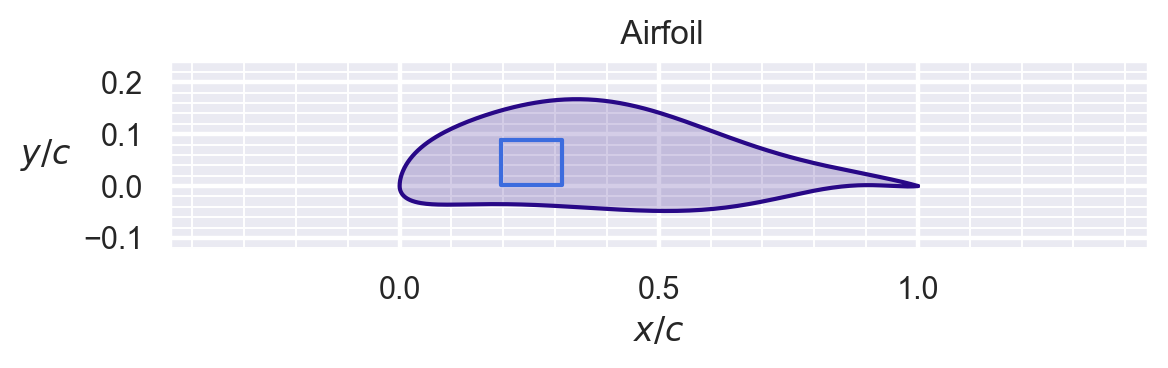

Step: 15, Action: [[-0.02916898  0.05817391 -0.0401428   0.04256269  0.01434888 -0.01125349
  -0.01699147  0.07084247 -0.09750651  0.05696991 -0.02526583 -0.04968932
   0.006906    0.00382112  0.02479248 -0.04108001  0.00747305  0.08191852
  -0.13038667 -0.00424723  0.04061971]], Reward: [53.281677], Done: [False], Info: [{'step': 6, 'efficiency': 54.19653744478237, 'cl': 0.5291757825662587, 'TimeLimit.truncated': False}]


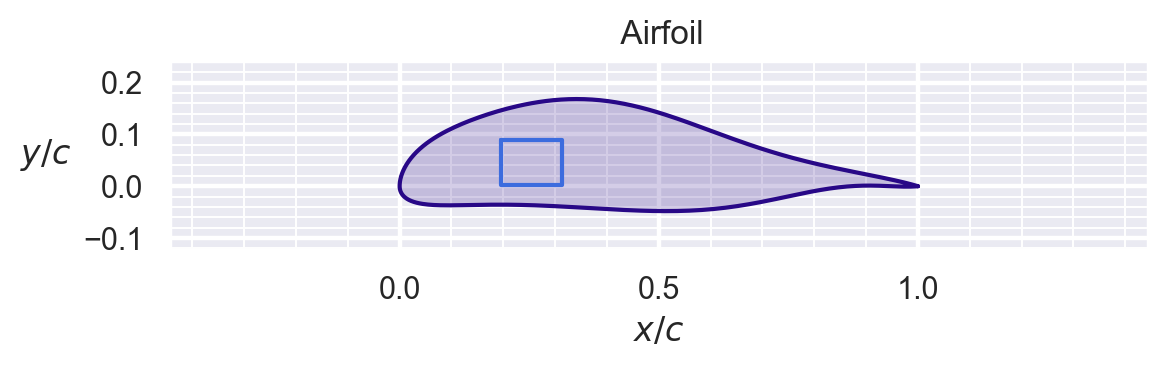

Step: 16, Action: [[-0.02779993  0.03879441 -0.03619596  0.03106213  0.0036692  -0.00987586
  -0.02631456  0.06218672 -0.07585399  0.05095705 -0.02250151 -0.03392978
   0.00118205  0.00179909  0.02666532 -0.04039223  0.00619285  0.05846144
  -0.10843104  0.00851063  0.04855491]], Reward: [53.323303], Done: [False], Info: [{'step': 7, 'efficiency': 54.47881248109349, 'cl': 0.5327402148183039, 'TimeLimit.truncated': False}]


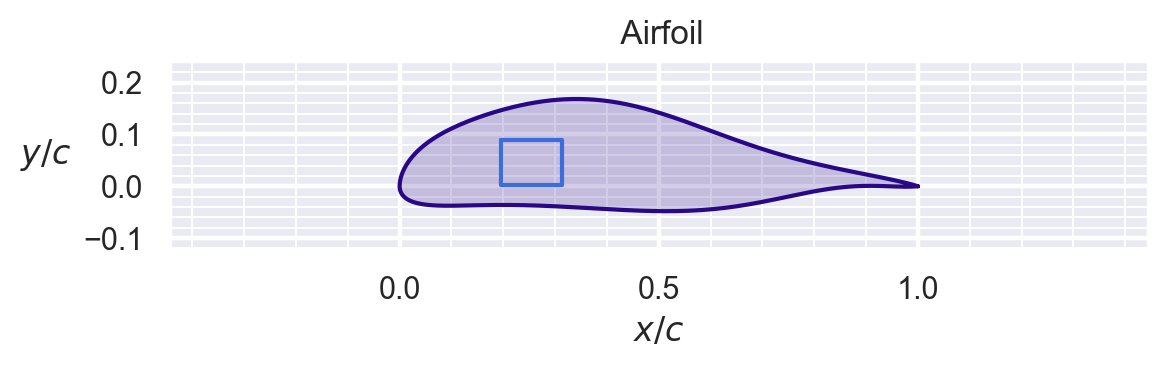

Step: 17, Action: [[-0.02463126  0.02728812 -0.02991793  0.02370512 -0.00056519 -0.00490795
  -0.0295777   0.05424777 -0.05901714  0.04555118 -0.02110606 -0.02533774
  -0.0026959   0.00051506  0.02741383 -0.0387317   0.00686657  0.04210307
  -0.08695139  0.01534647  0.04762492]], Reward: [53.33817], Done: [False], Info: [{'step': 8, 'efficiency': 54.68458997758482, 'cl': 0.535305652740996, 'TimeLimit.truncated': False}]


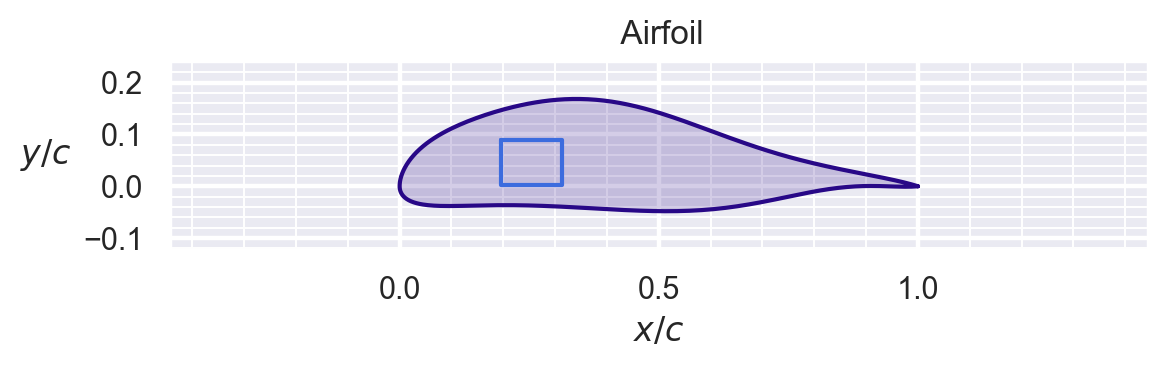

Step: 18, Action: [[-0.02095178  0.01981555 -0.02398762  0.0185667  -0.00234942 -0.00047271
  -0.02980274  0.04688975 -0.04677851  0.04043463 -0.0194421  -0.01982246
  -0.00473557 -0.00017799  0.02658875 -0.03676498  0.00804545  0.03009411
  -0.06994022  0.01886801  0.04288809]], Reward: [53.338985], Done: [False], Info: [{'step': 9, 'efficiency': 54.84107361319416, 'cl': 0.5372639000085657, 'TimeLimit.truncated': False}]


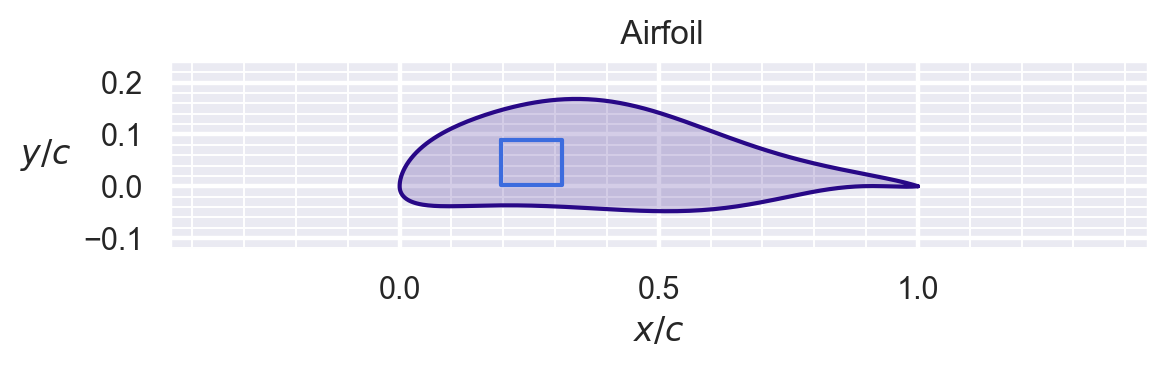

Step: 19, Action: [[-0.01747313  0.0147936  -0.01913241  0.01479736 -0.00306265  0.0026558
  -0.02843601  0.04019514 -0.0380237   0.03555971 -0.01737067 -0.01582915
  -0.00554147 -0.00052154  0.02484532 -0.03444155  0.00917237  0.02100485
  -0.05707838  0.02037218  0.03698254]], Reward: [53.332245], Done: [ True], Info: [{'step': 10, 'efficiency': 54.962452233097665, 'cl': 0.5388002238455618, 'episode': {'r': 482.289468, 'l': 10, 't': 7.850172}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.32643527,  0.34739304,  0.40206534,  0.4943126 ,  0.48664105,
        0.47545785,  0.13465321,  0.32448918,  0.1324393 ,  0.3232043 ,
       -0.26129413, -0.16187024, -0.00782281, -0.14240716, -0.0887821 ,
       -0.1341592 , -0.2906859 , -0.1379772 ,  0.18333194, -0.0830061 ,
        0.3055968 ], dtype=float32), 'cl_target': array([0.5], dtype=float32), 'boxes': array([0.25411418, 0.04559943, 0.11863234, 0.08697852], dtype=float32)}}]


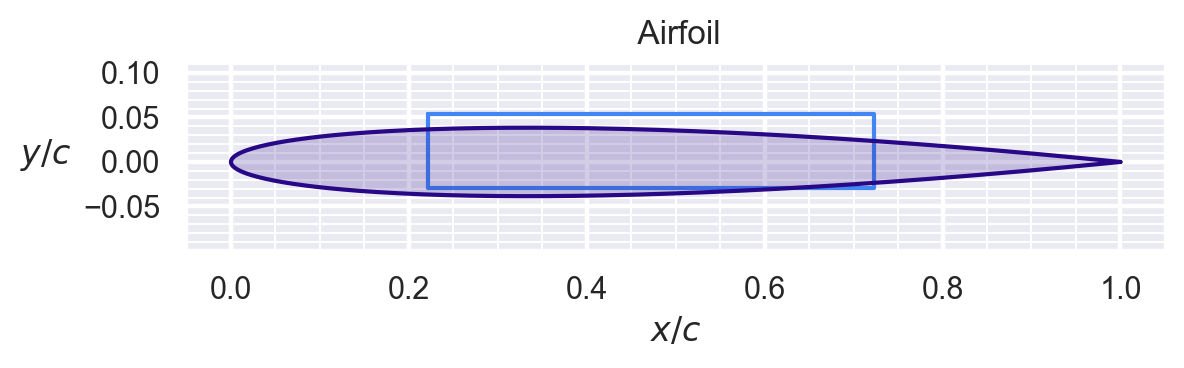

In [17]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()